# Trabajo Mineria

C:\Users\orteg\AppData\Local\Temp\ipykernel_23652\479359419.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desempleo_total["Año"] = desempleo_total["Trimestre Móvil"].str.extract(r"(\d{4})").astype(int)


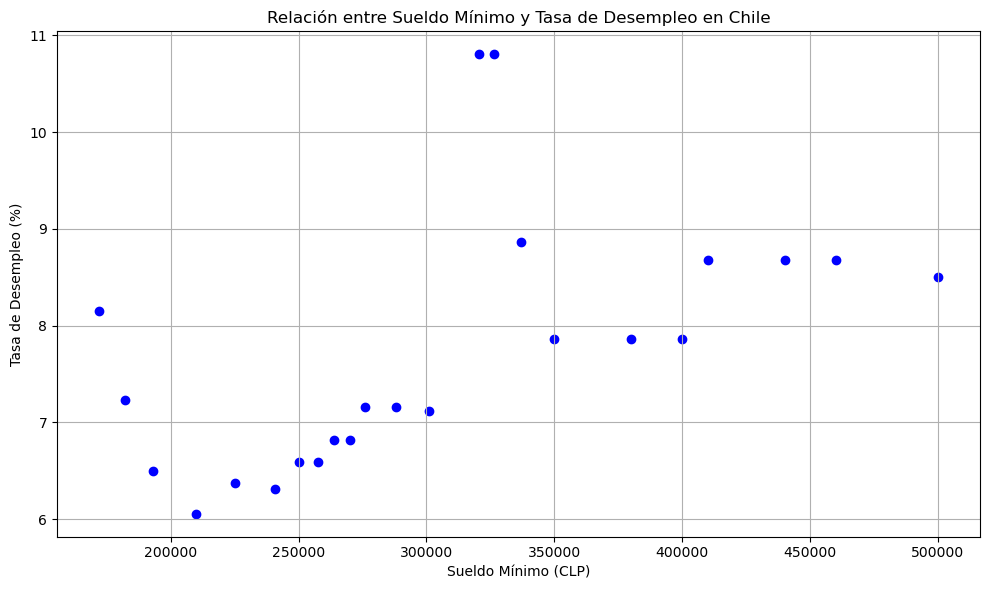

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los archivos CSV
sueldo_df = pd.read_csv("sueldo_minimo_chile.csv")
desempleo_df = pd.read_csv("Tasa desempleo.csv")

# Filtrar solo la tasa de desempleo del tramo etario "Total"
desempleo_total = desempleo_df[desempleo_df["Tramo etario"] == "Total"]

# Extraer el año desde la columna "Trimestre Móvil"
desempleo_total["Año"] = desempleo_total["Trimestre Móvil"].str.extract(r"(\d{4})").astype(int)

# Calcular la tasa promedio anual de desempleo
desempleo_anual = (
    desempleo_total.groupby("Año")["Value"]
    .mean()
    .reset_index()
    .rename(columns={"Value": "tasa_desempleo"})
)

# Procesar el DataFrame de sueldo mínimo
sueldo_df["Año"] = pd.to_datetime(sueldo_df["fecha"]).dt.year
sueldo_anual = sueldo_df[["Año", "monto_clp"]]

# Unir los DataFrames por el año
df_final = pd.merge(sueldo_anual, desempleo_anual, on="Año", how="inner")

# Crear el diagrama de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(df_final["monto_clp"], df_final["tasa_desempleo"], color="blue")
plt.title("Relación entre Sueldo Mínimo y Tasa de Desempleo en Chile")
plt.xlabel("Sueldo Mínimo (CLP)")
plt.ylabel("Tasa de Desempleo (%)")
plt.grid(True)
plt.tight_layout()
plt.show()



Correlación de Pearson: 0.54, p-valor: 0.0076
Pendiente: 0.00000773, Intercepto: 5.35, R²: 0.29


C:\Users\orteg\AppData\Local\Temp\ipykernel_23652\4291896621.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  desempleo_total["Año"] = desempleo_total["Trimestre Móvil"].str.extract(r"(\d{4})").astype(int)


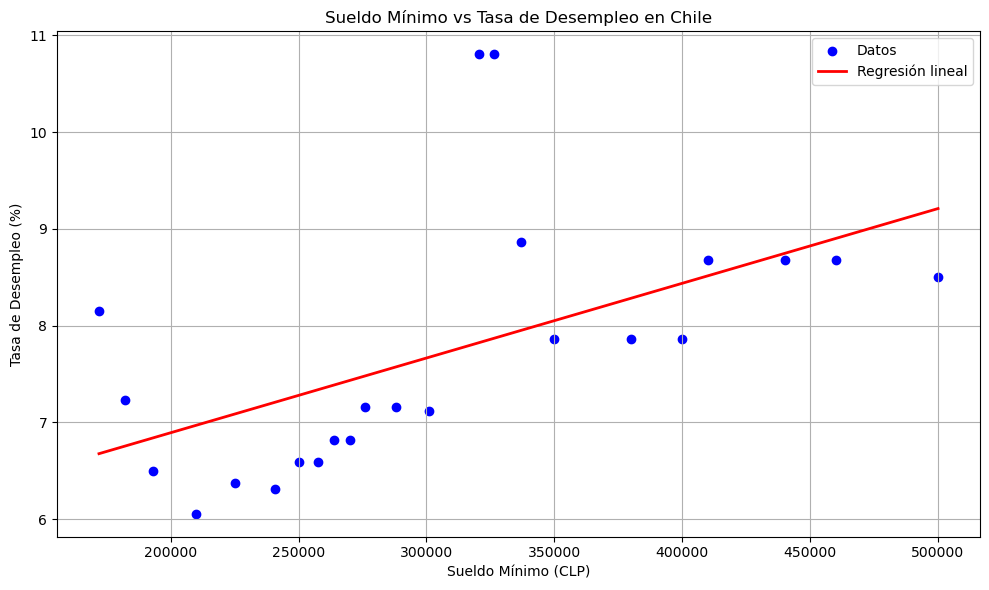

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Cargar los datos
sueldo_df = pd.read_csv("sueldo_minimo_chile.csv")
desempleo_df = pd.read_csv("Tasa desempleo.csv")

# Procesar sueldo mínimo
sueldo_df["Año"] = pd.to_datetime(sueldo_df["fecha"]).dt.year
sueldo_anual = sueldo_df[["Año", "monto_clp"]]

# Filtrar y procesar tasa de desempleo
desempleo_total = desempleo_df[desempleo_df["Tramo etario"] == "Total"]
desempleo_total["Año"] = desempleo_total["Trimestre Móvil"].str.extract(r"(\d{4})").astype(int)
desempleo_anual = (
    desempleo_total.groupby("Año")["Value"]
    .mean()
    .reset_index()
    .rename(columns={"Value": "tasa_desempleo"})
)

# Unir ambos DataFrames
df_final = pd.merge(sueldo_anual, desempleo_anual, on="Año", how="inner")

# Calcular correlación de Pearson
correlacion, p_valor = pearsonr(df_final["monto_clp"], df_final["tasa_desempleo"])
print(f"Correlación de Pearson: {correlacion:.2f}, p-valor: {p_valor:.4f}")

# Ajustar regresión lineal
X = df_final[["monto_clp"]]
y = df_final["tasa_desempleo"]
modelo = LinearRegression().fit(X, y)
pendiente = modelo.coef_[0]
intercepto = modelo.intercept_
r2 = modelo.score(X, y)
print(f"Pendiente: {pendiente:.8f}, Intercepto: {intercepto:.2f}, R²: {r2:.2f}")

# Crear gráfico con línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Datos")
plt.plot(X, modelo.predict(X), color="red", linewidth=2, label="Regresión lineal")
plt.title("Sueldo Mínimo vs Tasa de Desempleo en Chile")
plt.xlabel("Sueldo Mínimo (CLP)")
plt.ylabel("Tasa de Desempleo (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
